In [1]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump


# Load your dataset


In [2]:
base_path = "./AudioData"  # replace with the path to your 'AudioData' folder
actor_folders = [os.path.join(base_path, f) for f in os.listdir(base_path) if f in ['DC', 'JE', 'JK', 'KL']]

In [3]:
emotion_dict = {'a': 'anger', 'd': 'disgust', 'f': 'fear', 'h': 'happiness', 'n': 'neutral', 'sa': 'sadness', 'su': 'surprise'}


In [4]:
file_paths = []
labels = []
for actor_folder in actor_folders:
    for file_name in os.listdir(actor_folder):
        file_path = os.path.join(actor_folder, file_name)
        file_paths.append(file_path)

        # Extract the emotion label from the file name
        emotion_prefix = file_name.split('0')[0] if '0' in file_name else file_name[0]
        if len(emotion_prefix) > 1 and emotion_prefix[0] == 's':
            emotion_prefix = emotion_prefix[:2]
        else:
            emotion_prefix = emotion_prefix[0]
        emotion_label = emotion_dict.get(emotion_prefix, 'unknown')

        labels.append(emotion_label)  # This line should be inside the inner loop


# Preprocess your data


In [5]:
def extract_features(file_path, max_pad_len=40):
    audio_data, sample_rate = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        # Flatten the array
    mfccs = mfccs.flatten()

    # If the number of features is less than max_pad_len, pad with zeros
    if len(mfccs) < max_pad_len:
        mfccs = np.pad(mfccs, (0, max_pad_len - len(mfccs)))

    # If the number of features is more than max_pad_len, truncate the excess
    elif len(mfccs) > max_pad_len:
        mfccs = mfccs[:max_pad_len]

    return mfccs


# Extract features for all files


In [6]:
features = [extract_features(fp) for fp in file_paths]


# Convert the list of feature vectors to a numpy array

In [7]:
features = np.array(features)

# Split your data into a training set and a test set

In [8]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)


# Train your model

In [9]:
model = SVC()
model.fit(features_train, labels_train)

SVC()

# Evaluate your model


In [10]:
accuracy = model.score(features_test, labels_test)
print(f"Model accuracy: {accuracy*100}%")

Model accuracy: 28.125%


In [11]:
labels_np = np.array(labels)

# Get unique emotions and their counts

In [12]:
unique, counts = np.unique(labels_np, return_counts=True)

# Create a dictionary of emotions and their counts

In [13]:
emotion_counts = dict(zip(unique, counts))


# Create a bar plot

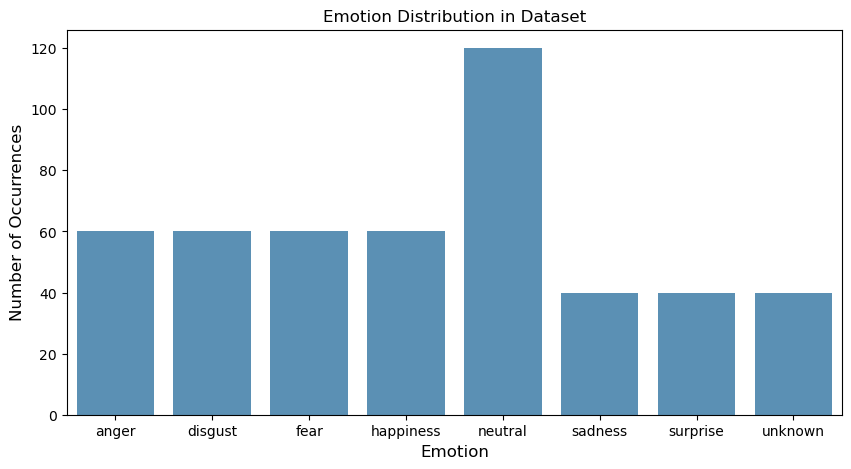

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(emotion_counts.keys()), y=list(emotion_counts.values()), alpha=0.8)
plt.title('Emotion Distribution in Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Emotion', fontsize=12)
plt.show()

# Save the Model

In [15]:
dump(model, 'model.joblib')

['model.joblib']

Epoch [10/100], Loss: 1.8249
Epoch [20/100], Loss: 1.4600
Epoch [30/100], Loss: 0.9376
Epoch [40/100], Loss: 0.3865
Epoch [50/100], Loss: 0.1419
Epoch [60/100], Loss: 0.0430
Epoch [70/100], Loss: 0.0174
Epoch [80/100], Loss: 0.0096
Epoch [90/100], Loss: 0.0063
Epoch [100/100], Loss: 0.0047
Model accuracy: 35.41666666666667%


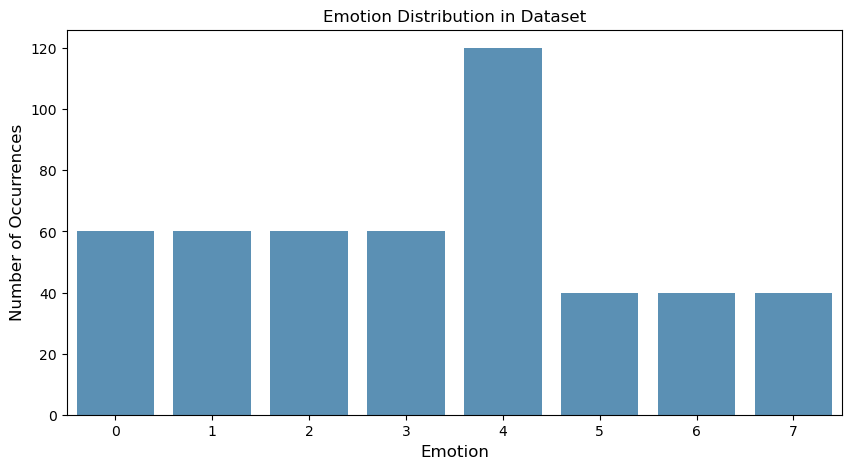

In [17]:
import os
import numpy as np
import librosa
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
base_path = "AudioData"  # replace with the path to your 'AudioData' folder
actor_folders = [os.path.join(base_path, f) for f in os.listdir(base_path) if f in ['DC', 'JE', 'JK', 'KL']]

emotion_dict = {'a': 'anger', 'd': 'disgust', 'f': 'fear', 'h': 'happiness', 'n': 'neutral', 'sa': 'sadness', 'su': 'surprise'}

file_paths = []
labels = []
for actor_folder in actor_folders:
    for file_name in os.listdir(actor_folder):
        file_path = os.path.join(actor_folder, file_name)
        file_paths.append(file_path)

        # Extract the emotion label from the file name
        emotion_prefix = file_name.split('0')[0] if '0' in file_name else file_name[0]
        if len(emotion_prefix) > 1 and emotion_prefix[0] == 's':
            emotion_prefix = emotion_prefix[:2]
        else:
            emotion_prefix = emotion_prefix[0]
        emotion_label = emotion_dict.get(emotion_prefix, 'unknown')

        labels.append(emotion_label)

# Preprocess data
def extract_features(file_path, max_pad_len=40):
    audio_data, sample_rate = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    if pad_width > 0:
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]
    return mfccs

# Extract features for all files
max_pad_len = 40
features = [extract_features(fp, max_pad_len) for fp in file_paths]

# Convert to numpy array
features = np.array(features)

# Convert labels to numeric values
label_to_idx = {label: idx for idx, label in enumerate(np.unique(labels))}
idx_to_label = {label: idx for label, idx in label_to_idx.items()}
labels_numeric = np.array([label_to_idx[label] for label in labels])

# Split data into training and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels_numeric, test_size=0.2)

# Convert data to PyTorch tensors
features_train_tensor = torch.tensor(features_train, dtype=torch.float32)
features_test_tensor = torch.tensor(features_test, dtype=torch.float32)
labels_train_tensor = torch.tensor(labels_train, dtype=torch.long)
labels_test_tensor = torch.tensor(labels_test, dtype=torch.long)

# Define RNN model
class EmotionRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(EmotionRNN, self).__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
        out, _ = self.rnn(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

input_size = 40
hidden_size = 128
output_size = len(np.unique(labels))
num_layers = 2

device = "cuda" if torch.cuda.is_available() else "cpu"  # Force execution on the CPU
model = EmotionRNN(input_size, hidden_size, output_size, num_layers).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
batch_size = 16

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(features_train_tensor.to(device))
    loss = criterion(outputs, labels_train_tensor.to(device))
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(features_test_tensor.to(device))
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == labels_test_tensor.to(device)).sum().item() / labels_test_tensor.size(0)

print(f'Model accuracy: {accuracy*100}%')

# Get unique emotions and their counts
labels_np = np.array(labels)
unique, counts = np.unique(labels_np, return_counts=True)
emotion_counts = dict(zip(unique, counts))

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=[idx_to_label[u] for u in unique], y=list(counts), alpha=0.8)
plt.title('Emotion Distribution in Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Emotion', fontsize=12)
plt.show()

# Save the model
# torch.save(model.state_dict(), 'emotion_rnn_model.pth')
